# Notebook para probar el segundo modelo de ASL
### Daniel Queijeiro Albo A01710441

/usr/local/lib/python3.12/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.7.2 is installed, but it is not compatible with the installed jaxlib version 0.7.1, so it will not be used.
  warnings.warn(


Cargando modelo...


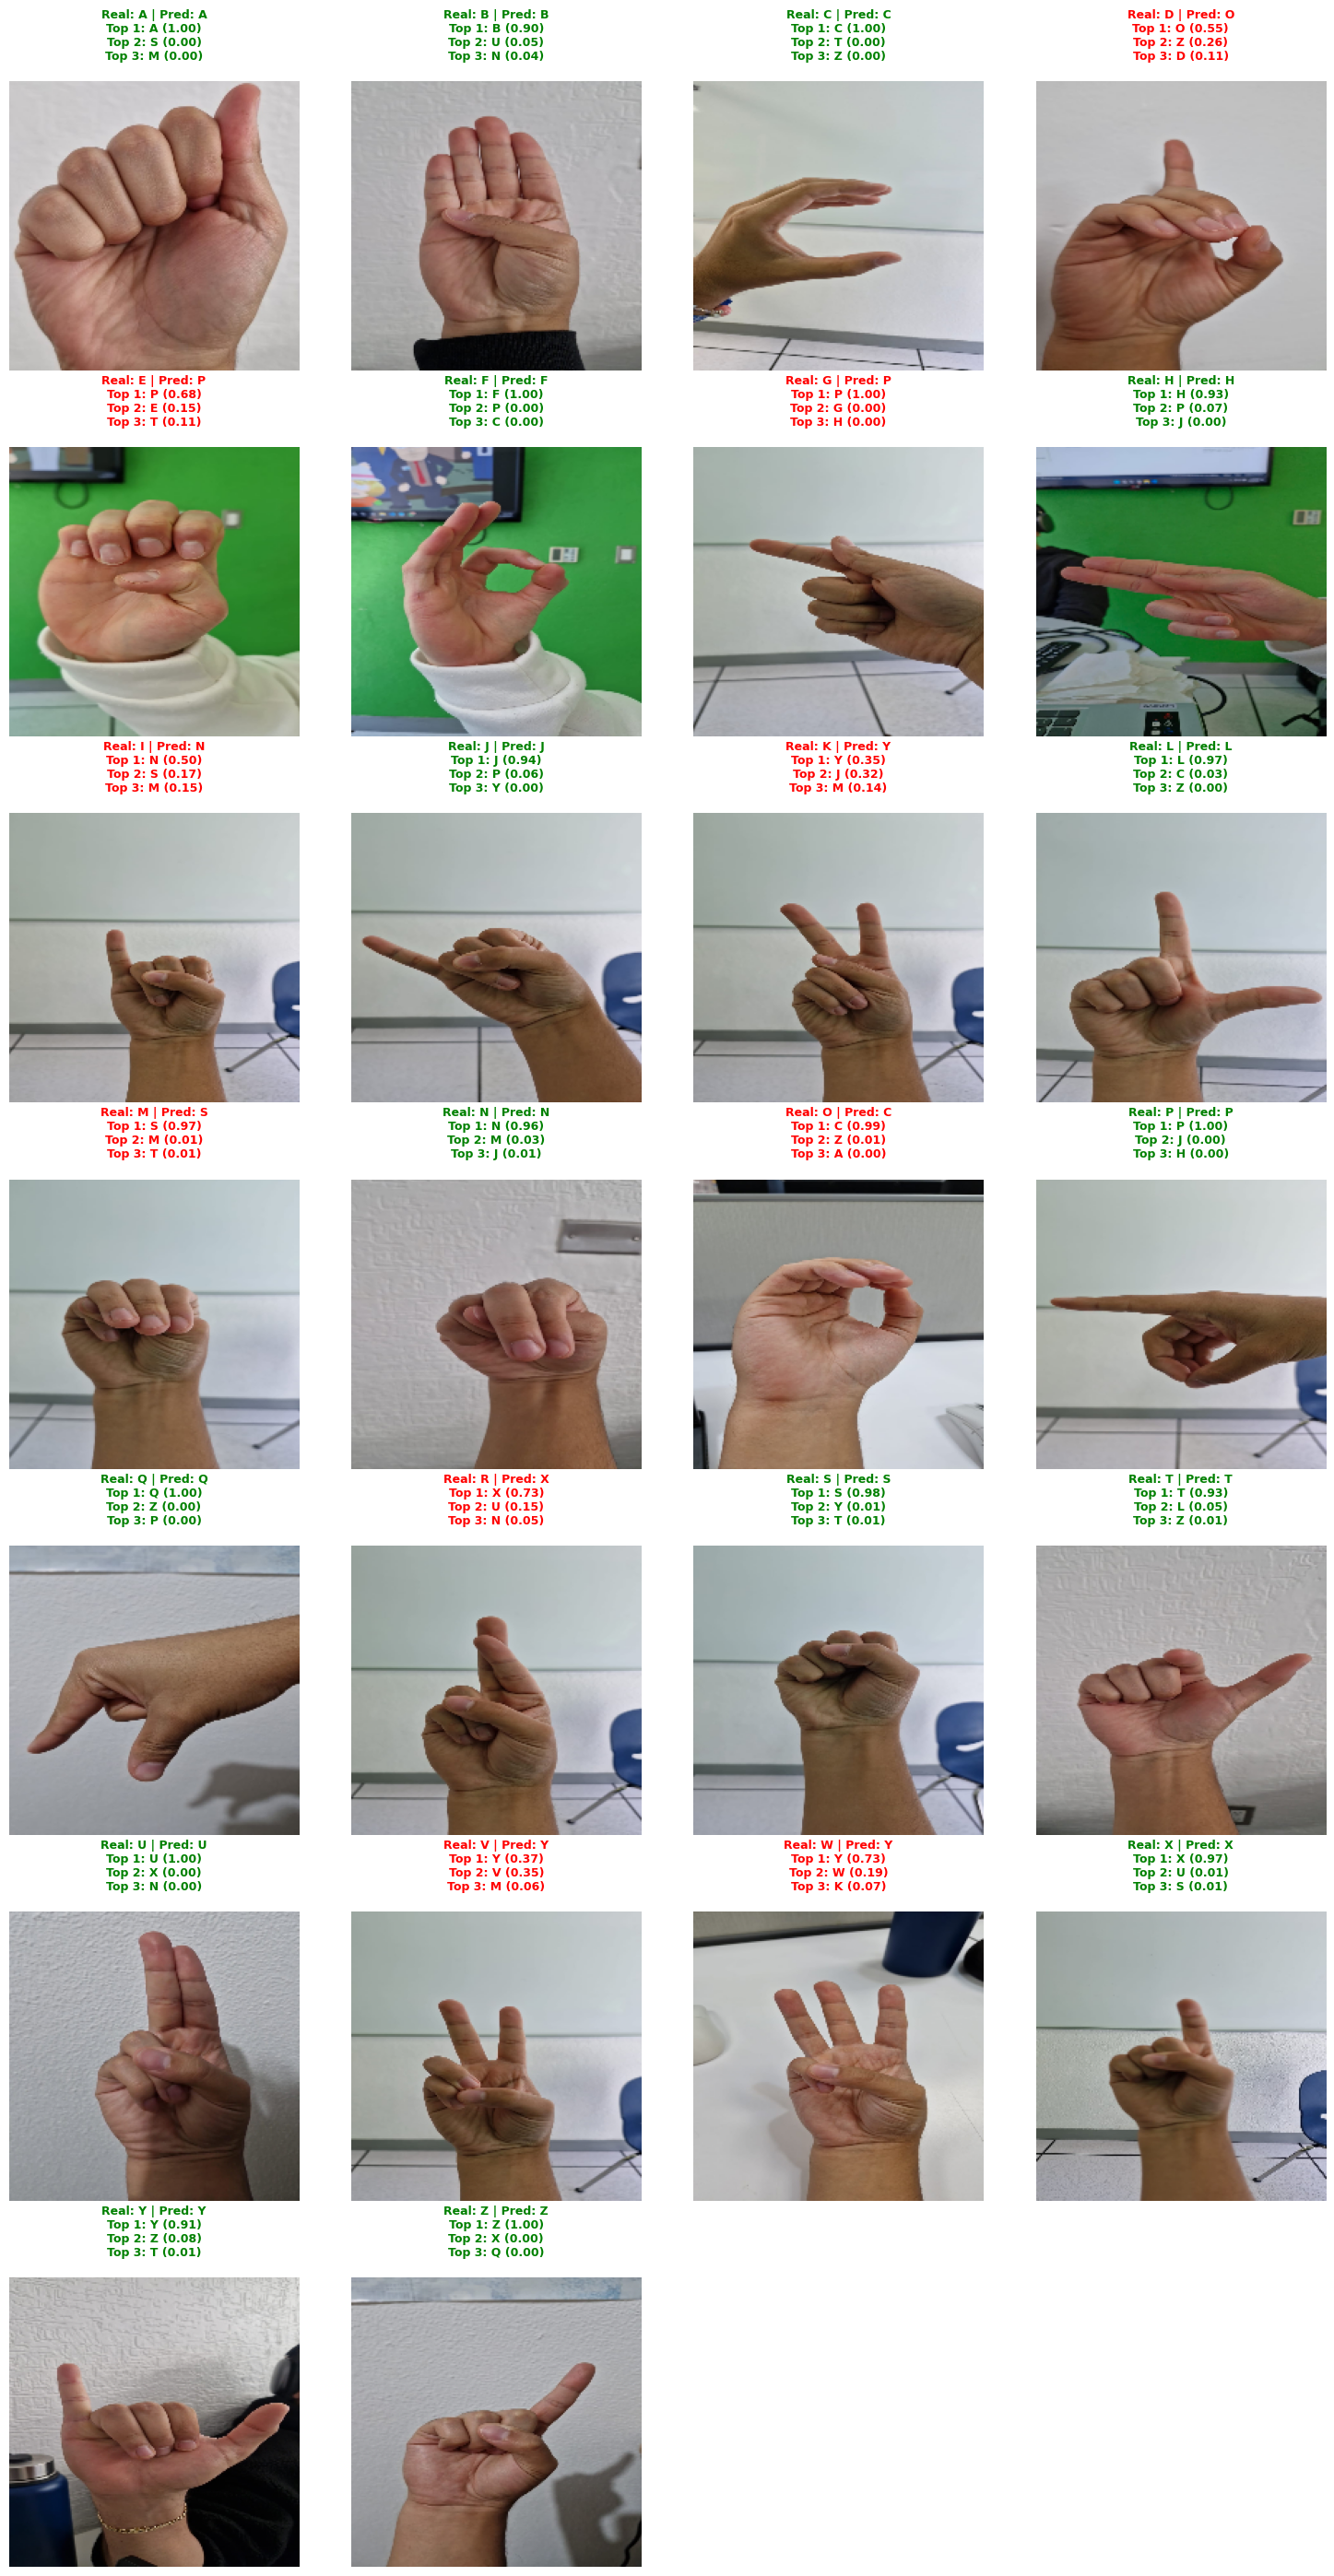


--- RESULTADOS FINALES ---
Total imágenes: 26
Correctas: 16
Precisión (Accuracy): 61.54%


In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import math

# --- CONFIGURACIÓN ---
FOLDER_PATH = "/content/fotos/"
MODEL_PATH = "/content/segundoModeloASL.keras"
IMG_SIZE = (200, 200)

# Lista de clases (asegúrate que coincida con tu entrenamiento)
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
               'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
               'U', 'V', 'W', 'X', 'Y', 'Z']

print("Cargando modelo...")
model = tf.keras.models.load_model(MODEL_PATH)

def predict_normal(image_path):
    img = cv2.imread(image_path)
    if img is None:
      return "Err", 0.0, None

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize
    try:
        crop_resized = cv2.resize(img_rgb, IMG_SIZE)
    except:
        return "ErrCrop", 0.0, None

    # Preparar para modelo
    img_array = img_to_array(crop_resized)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    preds = model.predict(img_array, verbose=0)[0]

    # Top 3 predictions
    top_3_indices = np.argsort(preds)[::-1][:3]
    top_3_predictions = []
    for i in top_3_indices:
        top_3_predictions.append((class_names[i], preds[i]))

    return top_3_predictions, crop_resized

# --- EJECUCIÓN VISUAL ---
files = sorted([f for f in os.listdir(FOLDER_PATH) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

if not files:
    print("No se encontraron imágenes en la carpeta.")
else:
    # Calcular filas necesarias para el grid (4 columnas)
    cols = 4
    rows = math.ceil(len(files) / cols)

    plt.figure(figsize=(15, rows * 4)) # Ajustar altura según cantidad de filas

    correctas = 0
    total = 0

    for i, filename in enumerate(files):
        path = os.path.join(FOLDER_PATH, filename)

        # --- Lógica para extraer la etiqueta real del nombre del archivo ---
        base_name = os.path.splitext(filename)[0]
        real_letter = None

        # Buscamos coincidencia exacta con los class_names (ej: "nothing" o "A")
        for cn in class_names:
            if base_name.lower() == cn.lower():
                real_letter = cn
                break

        # Si el archivo se llama "foto1.jpg", intentamos tomar la primera letra
        if real_letter is None:
            real_letter = base_name[0].upper()

        # --- Predicción ---
        prediction_result, img_processed = predict_normal(path)

        # Manejo de resultados
        if isinstance(prediction_result, str): # Hubo error de carga
            pred_letter = prediction_result
            conf = 0.0
            top_predictions_display = [(prediction_result, 0.0)]
        else:
            top_predictions_display = prediction_result
            pred_letter = top_predictions_display[0][0] # La mejor predicción
            conf = top_predictions_display[0][1]

        # Contabilizar
        # Nota: Convertimos a upper para comparar 'a' con 'A' si fuera necesario
        es_correcta = (pred_letter.lower() == real_letter.lower())
        if es_correcta: correctas += 1
        total += 1

        # --- Visualizar ---
        color = 'green' if es_correcta else 'red'

        if img_processed is not None:
            plt.subplot(rows, cols, i+1)
            plt.imshow(img_processed)

            title_text = f"Real: {real_letter} | Pred: {pred_letter}\n"
            for j, (letter, confidence) in enumerate(top_predictions_display):
                title_text += f"Top {j+1}: {letter} ({confidence:.2f})\n"

            plt.title(title_text, color=color, fontweight='bold', fontsize=9)
            plt.axis('off')

    plt.tight_layout()
    plt.show()

    print(f"\n--- RESULTADOS FINALES ---")
    print(f"Total imágenes: {total}")
    print(f"Correctas: {correctas}")
    print(f"Precisión (Accuracy): {(correctas/total)*100:.2f}%")

Cargando modelo...
Procesando imágenes en: /content/fotos...
Real: A | Predicción: A | Confianza: 1.00
Real: B | Predicción: B | Confianza: 0.91
Real: C | Predicción: C | Confianza: 1.00
Real: D | Predicción: O | Confianza: 0.58
Real: E | Predicción: P | Confianza: 0.67
Real: F | Predicción: F | Confianza: 1.00
Real: G | Predicción: P | Confianza: 1.00
Real: H | Predicción: H | Confianza: 0.94
Real: I | Predicción: N | Confianza: 0.49
Real: J | Predicción: J | Confianza: 0.95
Real: K | Predicción: Y | Confianza: 0.32
Real: L | Predicción: L | Confianza: 0.97
Real: M | Predicción: S | Confianza: 0.97
Real: N | Predicción: N | Confianza: 0.95
Real: O | Predicción: C | Confianza: 0.99
Real: P | Predicción: P | Confianza: 1.00
Real: Q | Predicción: Q | Confianza: 1.00
Real: R | Predicción: X | Confianza: 0.73
Real: S | Predicción: S | Confianza: 0.98
Real: T | Predicción: T | Confianza: 0.94
Real: U | Predicción: U | Confianza: 1.00
Real: V | Predicción: V | Confianza: 0.38
Real: W | Predi

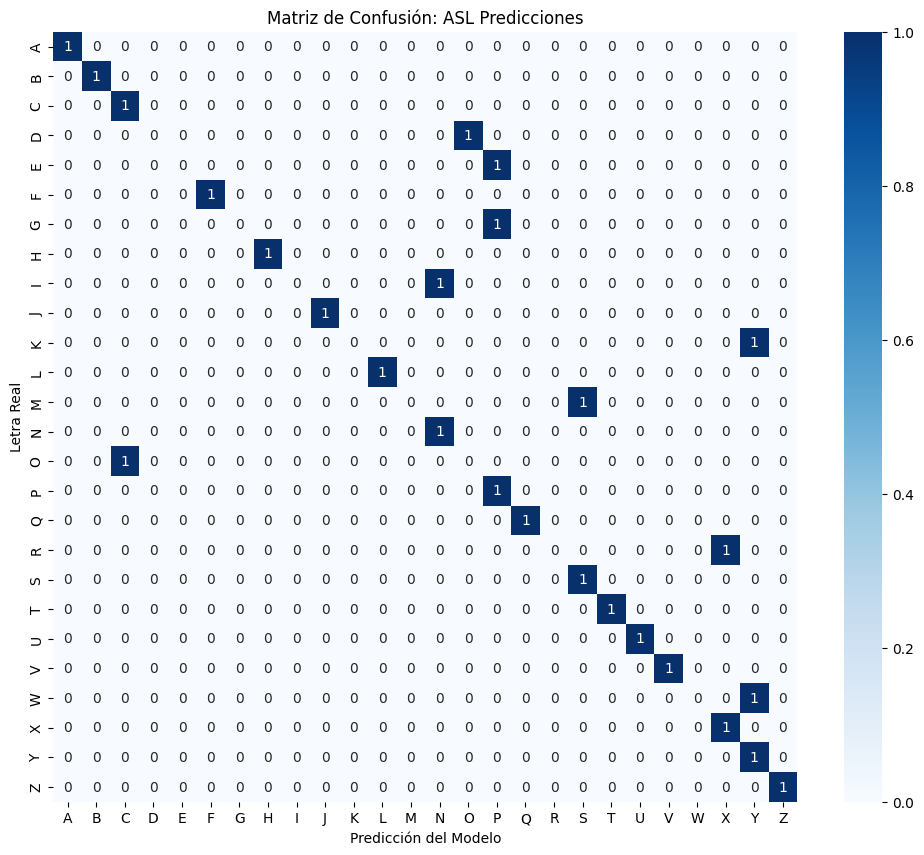


Reporte de Clasificación:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         1
           B       1.00      1.00      1.00         1
           C       0.50      1.00      0.67         1
           D       0.00      0.00      0.00         1
           E       0.00      0.00      0.00         1
           F       1.00      1.00      1.00         1
           G       0.00      0.00      0.00         1
           H       1.00      1.00      1.00         1
           I       0.00      0.00      0.00         1
           J       1.00      1.00      1.00         1
           K       0.00      0.00      0.00         1
           L       1.00      1.00      1.00         1
           M       0.00      0.00      0.00         1
           N       0.50      1.00      0.67         1
           O       0.00      0.00      0.00         1
           P       0.33      1.00      0.50         1
           Q       1.00      1.00      1.00         1


In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import os

# ==== CONFIG ====
TEST_DIR = "/content/fotos"
IMG_SIZE = (200, 200)

# Lista de clases (Alfabeto)
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
               'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
               'U', 'V', 'W', 'X', 'Y', 'Z']

# ==== LOAD MODEL ====
print("Cargando modelo...")
model = tf.keras.models.load_model(MODEL_PATH)

# Listas para guardar resultados
y_true = [] # La letra real (basada en el nombre del archivo)
y_pred = [] # La letra que el modelo predijo

# ==== BUCLE PARA PROCESAR LAS 26 IMÁGENES ====
print(f"Procesando imágenes en: {TEST_DIR}...")

# Iteramos sobre cada letra para buscar su archivo correspondiente
for letter in class_names:
    # Buscamos archivos que empiecen con la letra (ej: "A.jpg", "A_test.png")
    found_file = None
    for filename in os.listdir(TEST_DIR):
        if filename.upper().startswith(letter) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            found_file = filename
            break

    if found_file:
        # Cargar y preprocesar
        img_path = os.path.join(TEST_DIR, found_file)
        img = image.load_img(img_path, target_size=IMG_SIZE)
        img_array = image.img_to_array(img)

        img_array = img_array / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Predecir
        predictions = model.predict(img_array, verbose=0)
        pred_class_index = np.argmax(predictions[0])
        predicted_letter = class_names[pred_class_index]

        # Guardar datos
        y_true.append(letter)            # La letra que esperábamos (del bucle)
        y_pred.append(predicted_letter)  # La letra que el modelo dijo

        print(f"Real: {letter} | Predicción: {predicted_letter} | Confianza: {np.max(predictions[0]):.2f}")
    else:
        print(f"Advertencia: No se encontró imagen para la letra '{letter}'")

# ==== GENERAR MATRIZ DE CONFUSIÓN ====
if len(y_true) > 0:
    cm = confusion_matrix(y_true, y_pred, labels=class_names)

    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Matriz de Confusión: ASL Predicciones')
    plt.xlabel('Predicción del Modelo')
    plt.ylabel('Letra Real')
    plt.show()

    # ==== REPORTE DE TEXTO ====
    print("\nReporte de Clasificación:")
    print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))
else:
    print("No se procesaron imágenes. Revisa la ruta de la carpeta.")

# Implementación de mediapipe
Para recortar las fotos correctamente y tambien reducir la cantidad de ruido que recibe el modelo usamos mediapipe.

In [3]:
%pip install mediapipe

In [5]:
import os
import cv2
import mediapipe as mp

model = tf.keras.models.load_model(MODEL_PATH)
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5)

def get_square_crop(img, landmarks, padding=40):
    h, w, _ = img.shape

    # 1. Obtener caja original
    x_vals = [l.x * w for l in landmarks]
    y_vals = [l.y * h for l in landmarks]

    min_x, max_x = min(x_vals), max(x_vals)
    min_y, max_y = min(y_vals), max(y_vals)

    # 2. Calcular centro y el lado más largo
    center_x = (min_x + max_x) // 2
    center_y = (min_y + max_y) // 2

    box_width = max_x - min_x
    box_height = max_y - min_y

    # El lado del cuadrado será el lado más largo de la mano + padding
    side_length = max(box_width, box_height) + padding

    # 3. Calcular nuevas coordenadas del cuadrado
    new_min_x = int(center_x - side_length // 2)
    new_max_x = int(center_x + side_length // 2)
    new_min_y = int(center_y - side_length // 2)
    new_max_y = int(center_y + side_length // 2)

    # 4. Asegurar que no nos salimos de la imagen
    new_min_x = max(0, new_min_x)
    new_min_y = max(0, new_min_y)
    new_max_x = min(w, new_max_x)
    new_max_y = min(h, new_max_y)

    return img[new_min_y:new_max_y, new_min_x:new_max_x]

def predict_smart(image_path):
    img = cv2.imread(image_path)
    if img is None: return "Err", 0.0, None

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = hands.process(img_rgb)

    if results.multi_hand_landmarks:
        # Usar lógica de cuadrado
        crop = get_square_crop(img_rgb, results.multi_hand_landmarks[0].landmark)
    else:
        # Si no hay mano, usar centro
        h, w, _ = img.shape
        # Recorte central simple
        crop = img_rgb # Fallback

    # Resize
    try:
        crop_resized = cv2.resize(crop, IMG_SIZE)
    except:
        return "ErrCrop", 0.0, None

    # Preparar para modelo
    img_array = img_to_array(crop_resized)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    preds = model.predict(img_array, verbose=0)[0]

    # Top 3 predictions
    top_3_indices = np.argsort(preds)[::-1][:3]
    top_3_predictions = []
    for i in top_3_indices:
        top_3_predictions.append((class_names[i], preds[i]))

    return top_3_predictions, crop_resized

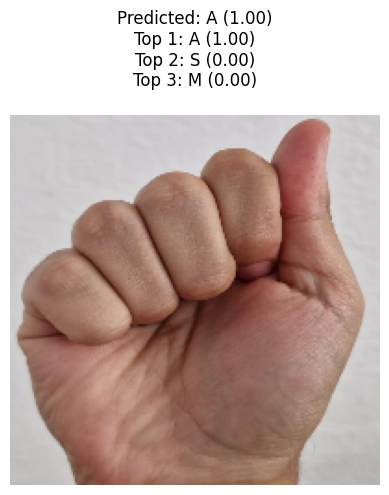


Predicted class (top 1): A
Confidence (top 1): 1.00

Top 3 predictions:
- A: 1.00
- S: 0.00
- M: 0.00


In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

# ==== CONFIG ====
IMG_PATH   = "/content/fotos/a.jpeg"

class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
               'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
               'U', 'V', 'W', 'X', 'Y', 'Z']

prediction_result, img_processed = predict_smart(IMG_PATH)

if isinstance(prediction_result, str):
    print(f"Prediction failed for {IMG_PATH}: {prediction_result}")
    try:
        original_img = plt.imread(IMG_PATH)
        plt.imshow(original_img)
        plt.title(f"Original image: {os.path.basename(IMG_PATH)}\nPrediction error: {prediction_result}")
        plt.axis("off")
        plt.show()
    except Exception as e:
        print(f"Could not load original image for display either: {e}")
else:
    predicted_letter = prediction_result[0][0]
    confidence = prediction_result[0][1]

    if img_processed is not None:
        plt.imshow(img_processed)
        title_text = f"Predicted: {predicted_letter} ({confidence:.2f})\n"
        for i, (letter, conf) in enumerate(prediction_result):
            title_text += f"Top {i+1}: {letter} ({conf:.2f})\n"
        plt.title(title_text)
        plt.axis("off")
        plt.show()
    else:
        print(f"Predicted: {predicted_letter} ({confidence:.2f}), but processed image was not returned.")
        try:
            original_img = plt.imread(IMG_PATH)
            plt.imshow(original_img)
            plt.title(f"Original image: {os.path.basename(IMG_PATH)}\nPredicted: {predicted_letter} (processed image not shown)")
            plt.axis("off")
            plt.show()
        except Exception as e:
            print(f"Could not load original image for display either: {e}")

    print(f"\nPredicted class (top 1): {predicted_letter}")
    print(f"Confidence (top 1): {confidence:.2f}")
    print("\nTop 3 predictions:")
    for letter, conf in prediction_result:
        print(f"- {letter}: {conf:.2f}")

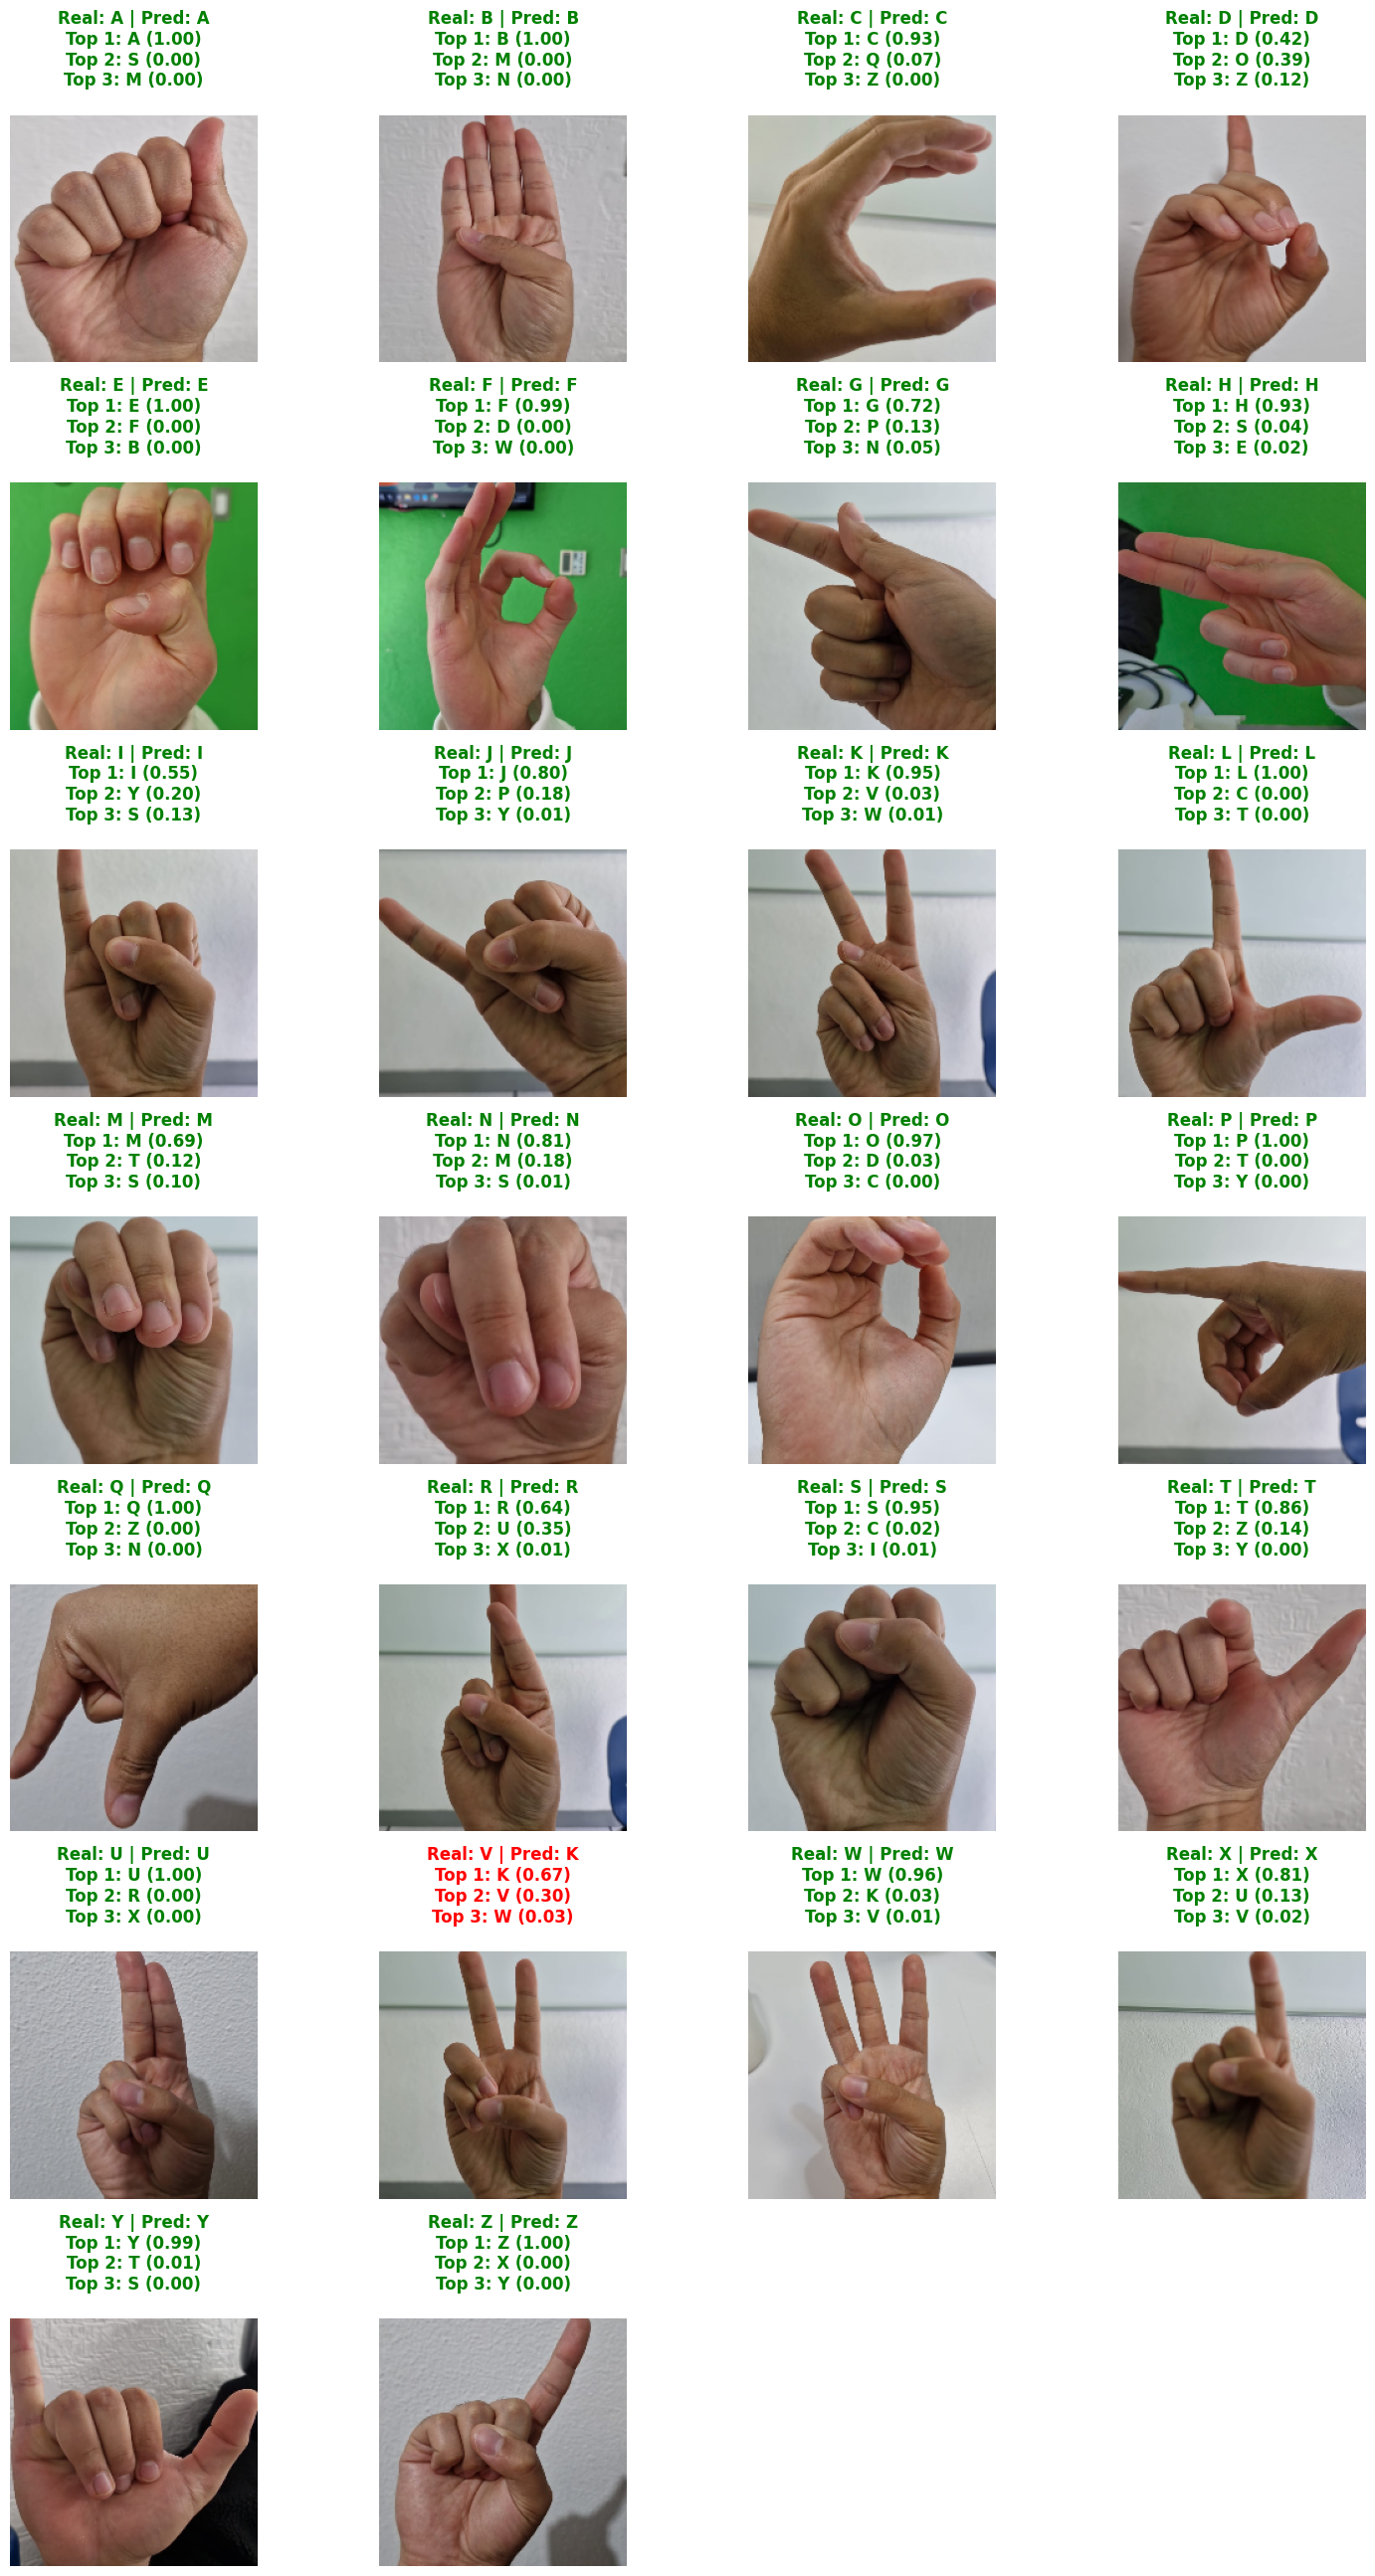


Precisión corregida: 96.15%


In [7]:
import os
import cv2
import mediapipe as mp
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

# --- CONFIGURACIÓN ---
FOLDER_PATH = "/content/fotos/"
MODEL_PATH = "/content/segundoModeloASL.keras"
IMG_SIZE = (200, 200)

class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
               'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
               'U', 'V', 'W', 'X', 'Y', 'Z']

# --- EJECUCIÓN VISUAL ---
files = sorted([f for f in os.listdir(FOLDER_PATH) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

# Configurar plot para ver las imágenes procesadas
plt.figure(figsize=(15, len(files)))

correctas = 0
total = 0

for i, filename in enumerate(files):
    path = os.path.join(FOLDER_PATH, filename)
    real_letter = filename[0].upper()

    # Actualizado para recibir las top 3 predicciones y la imagen procesada
    prediction_result, img_processed = predict_smart(path)

    # Manejo de errores y extracción de la mejor predicción
    if isinstance(prediction_result, str):
        pred_letter = prediction_result
        conf = 0.0
        top_predictions_display = [(prediction_result, 0.0)]
    else:
        top_predictions_display = prediction_result
        pred_letter = top_predictions_display[0][0] # Mejor predicción
        conf = top_predictions_display[0][1]

    # Contabilizar
    es_correcta = (pred_letter == real_letter)
    if es_correcta: correctas += 1
    total += 1

    # Visualizar
    color = 'green' if es_correcta else 'red'

    if img_processed is not None:
        plt.subplot(len(files)//4 + 1, 4, i+1)
        plt.imshow(img_processed)
        title_text = f"Real: {real_letter} | Pred: {pred_letter}\n"
        for j, (letter, confidence) in enumerate(top_predictions_display):
            title_text += f"Top {j+1}: {letter} ({confidence:.2f})\n"
        plt.title(title_text, color=color, fontweight='bold')
        plt.axis('off')

plt.tight_layout()
plt.show()

print(f"\nPrecisión corregida: {(correctas/total)*100:.2f}%")

Procesando 26 imágenes para generar la matriz...


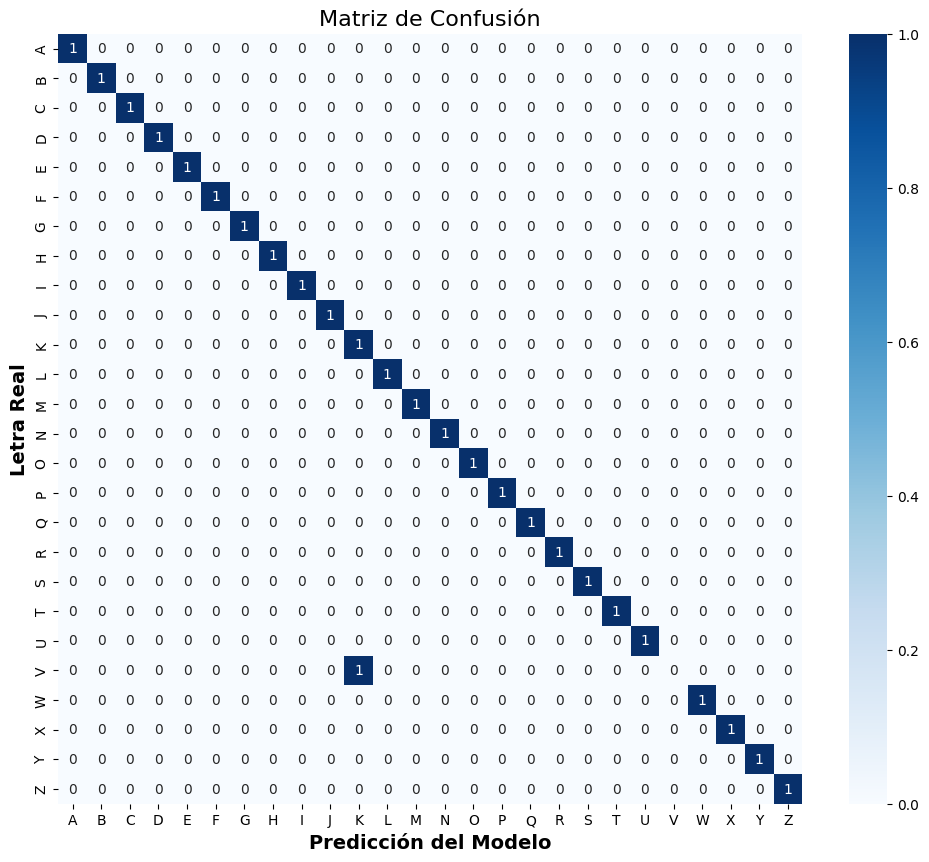


REPORTE DE CLASIFICACIÓN DETALLADO
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         1
           B       1.00      1.00      1.00         1
           C       1.00      1.00      1.00         1
           D       1.00      1.00      1.00         1
           E       1.00      1.00      1.00         1
           F       1.00      1.00      1.00         1
           G       1.00      1.00      1.00         1
           H       1.00      1.00      1.00         1
           I       1.00      1.00      1.00         1
           J       1.00      1.00      1.00         1
           K       0.50      1.00      0.67         1
           L       1.00      1.00      1.00         1
           M       1.00      1.00      1.00         1
           N       1.00      1.00      1.00         1
           O       1.00      1.00      1.00         1
           P       1.00      1.00      1.00         1
           Q       1.00      1.00      1.00  

In [8]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# --- 1. CONFIGURACIÓN ---
FOLDER_PATH = "/content/fotos/"
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
               'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
               'U', 'V', 'W', 'X', 'Y', 'Z']

# Listas para guardar los resultados
y_true = [] # La letra real (ej: A)
y_pred = [] # La letra que dijo el modelo (ej: E)

# Obtener archivos ordenados
files = sorted([f for f in os.listdir(FOLDER_PATH) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

print(f"Procesando {len(files)} imágenes para generar la matriz...")

# --- 2. BUCLE DE PREDICCIÓN ---
for filename in files:
    full_path = os.path.join(FOLDER_PATH, filename)

    # Adivinar la letra real por el nombre del archivo (ej: "a.jpg" -> "A")
    real_letter = filename[0].upper()

    try:
        prediction_result, _ = predict_smart(full_path)
        if isinstance(prediction_result, str):
            pred_letter = prediction_result
        else:
            pred_letter = prediction_result[0][0] # La mejor predicción es la primera de la lista
    except Exception as e:
        print(f"Error llamando predict_smart para {filename}: {e}")
        pred_letter = "Err"    # Indicar un error en la predicción

    # Guardar en las listas
    y_true.append(real_letter)
    y_pred.append(pred_letter)

# --- 3. GENERAR MATRIZ DE CONFUSIÓN ---
cm = confusion_matrix(y_true, y_pred, labels=class_names)

# --- 4. GRAFICAR ---
plt.figure(figsize=(12, 10)) # Tamaño grande para que se vean los números
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicción del Modelo', fontsize=14, fontweight='bold')
plt.ylabel('Letra Real', fontsize=14, fontweight='bold')
plt.title('Matriz de Confusión', fontsize=16)
plt.show()

# --- 5. REPORTE DETALLADO ---
print("\n" + "="*60)
print("REPORTE DE CLASIFICACIÓN DETALLADO")
print("="*60)

print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))